In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('/content/question4-stock-data.csv', parse_dates=['Date'])

print(data.isnull().sum())
print()

data = data.ffill()

# Show basic info
print(data.info())
print(data.describe())
print()
print(data.isnull().sum())

Unnamed: 0      0
Date          110
Adj Close      93
Close         117
High           95
Low           127
Open          103
Volume        145
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  11291 non-null  int64         
 1   Date        11291 non-null  datetime64[ns]
 2   Adj Close   11291 non-null  float64       
 3   Close       11291 non-null  float64       
 4   High        11291 non-null  float64       
 5   Low         11291 non-null  float64       
 6   Open        11291 non-null  float64       
 7   Volume      11291 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 705.8 KB
None
         Unnamed: 0                           Date     Adj Close  \
count  11291.000000                          11291  11291.000000   
mean    5645.000000  2002-07-28 16:29:40.3

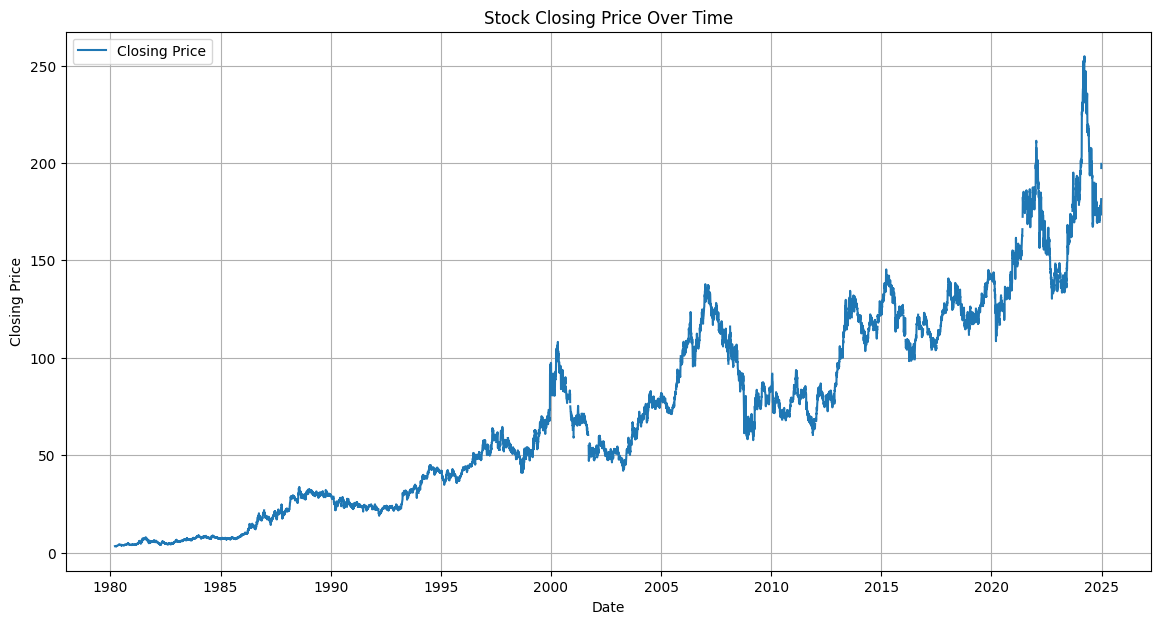

In [ ]:

data['Date'] = pd.to_datetime(data['Date'])

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day


data['rolling_mean_5'] = data['Close'].rolling(window=5).mean()
data['rolling_std_5'] = data['Close'].rolling(window=5).std()

data['lag_1'] = data['Close'].shift(1)
data['lag_5'] = data['Close'].shift(5)
data['lag_10'] = data['Close'].shift(10)

data['ema_10'] = data['Close'].ewm(span=10, adjust=False).mean()

data['rolling_volume_5'] = data['Volume'].rolling(5).mean()
data['volatility'] = (data['High'] - data['Low']) / (data['Open']+1)


from scipy.fftpack import fft

fft_vals = fft(data['Close'].dropna().values)
data['fourier_1'] = np.real(fft_vals[:len(data)])

data['close_diff_1'] = data['Close'].diff(1)
data['close_diff_5'] = data['Close'].diff(5)


# Aggregating duplicates by taking the average closing price for each date
data = data.groupby('Date').agg({'Close': 'mean'}).reset_index()

# Then proceed to set the date as the index and ensure it's sorted
data = data.set_index('Date').sort_index()
data = data.asfreq('B')

# Visualize the closing price
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Closing Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


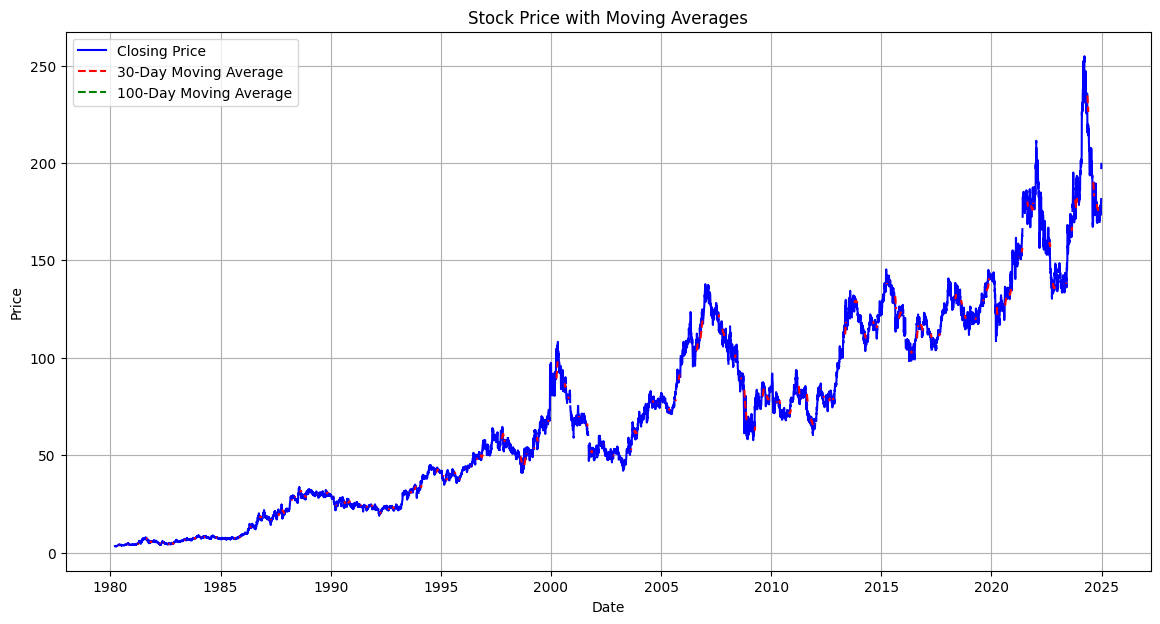

In [ ]:


data['MA_30'] = data['Close'].rolling(window=30).mean()  # 30-day Moving Average
data['MA_100'] = data['Close'].rolling(window=100).mean()  # 100-day Moving Average

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['MA_30'], label='30-Day Moving Average', color='red', linestyle='--')
plt.plot(data['MA_100'], label='100-Day Moving Average', color='green', linestyle='--')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


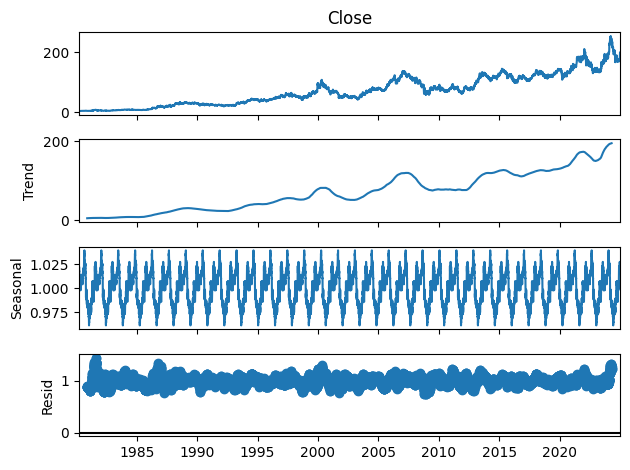

In [ ]:

# # Fill missing values using forward fill (or choose any other method)
# data['Close'] = data['Close'].fillna(method='ffill')

# # Alternatively, use backward fill
# # data['Close'] = data['Close'].fillna(method='bfill')

# Or interpolate missing values
data['Close'] = data['Close'].interpolate()


# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(data['Close'], model='multiplicative', period=365)
decomposition.plot()
plt.show()



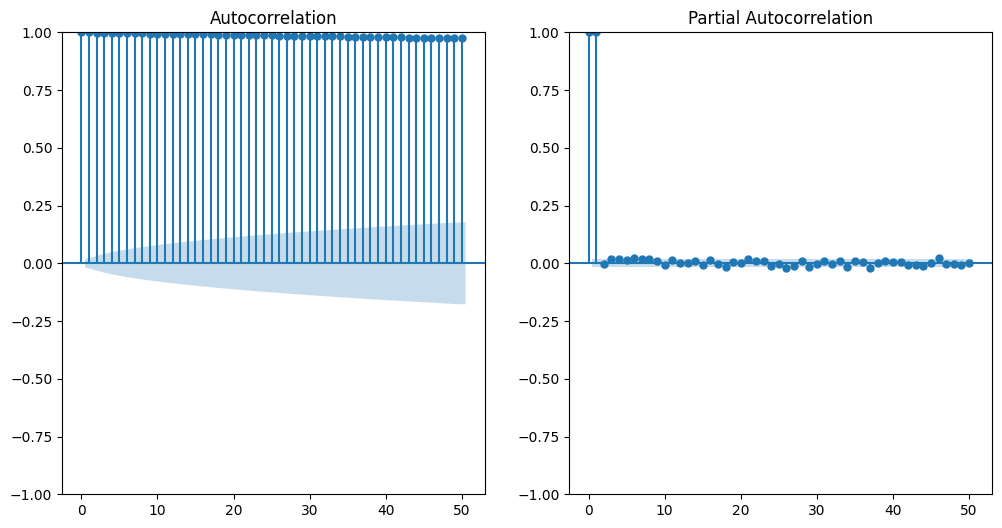

In [ ]:
# ACF and PACF plots to check the correlation at different lags
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['Close'], lags=50, ax=plt.gca())  # ACF plot
plt.subplot(122)
plot_pacf(data['Close'], lags=50, ax=plt.gca())  # PACF plot
plt.show()



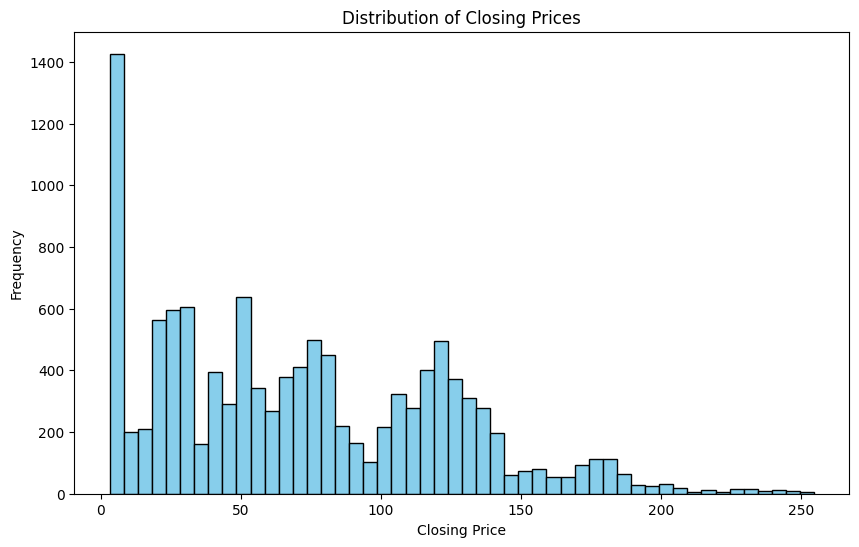

In [ ]:
# Histogram to visualize the distribution of the closing prices
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()



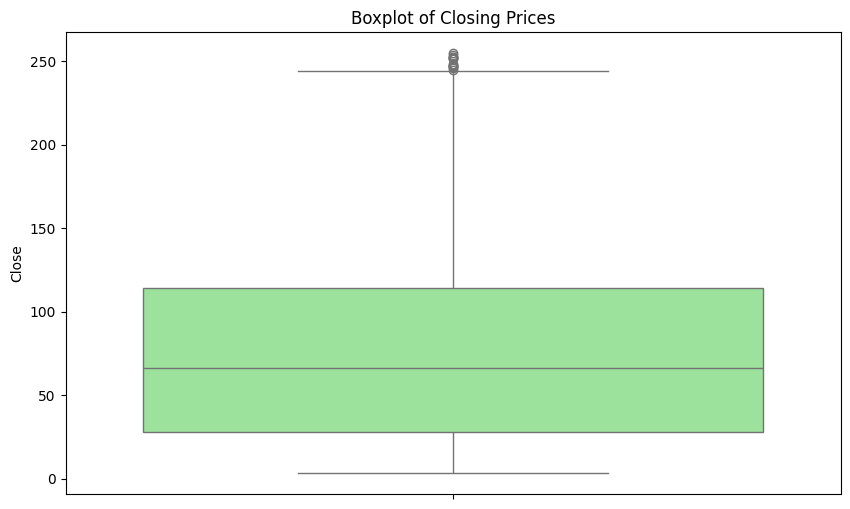

In [ ]:
# Boxplot to visualize the spread and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data['Close'], color='lightgreen')
plt.title('Boxplot of Closing Prices')
plt.show()


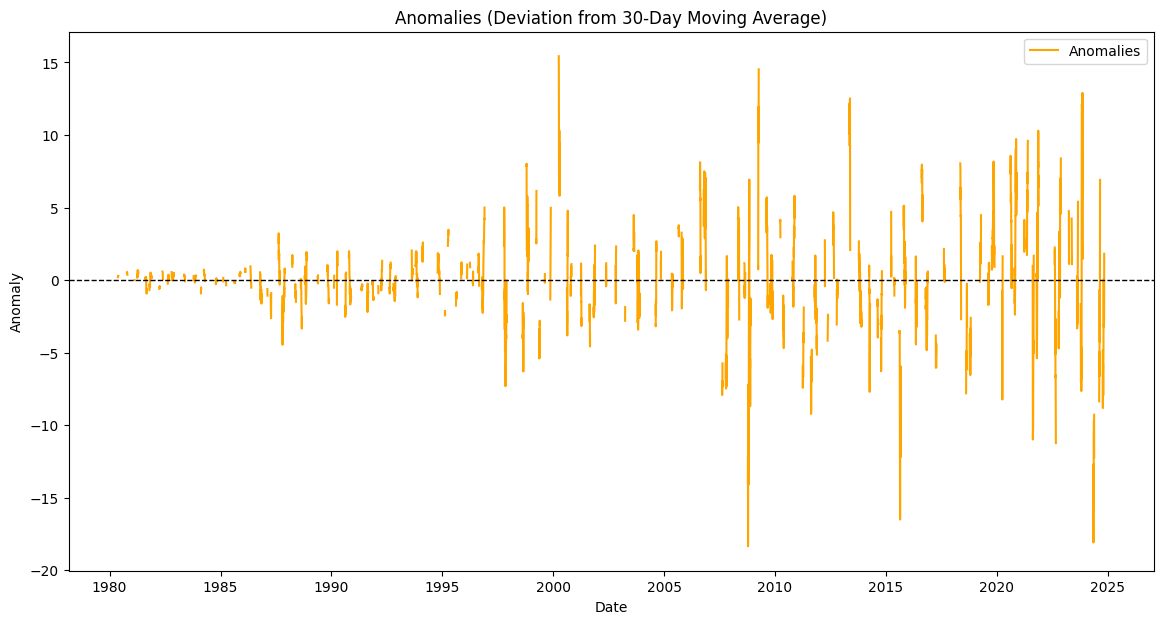

In [ ]:

# Calculate anomalies (differences from the 30-day MA)
data['Anomalies'] = data['Close'] - data['MA_30']

plt.figure(figsize=(14, 7))
plt.plot(data['Anomalies'], label='Anomalies', color='orange')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Anomalies (Deviation from 30-Day Moving Average)')
plt.xlabel('Date')
plt.ylabel('Anomaly')
plt.legend()
plt.show()



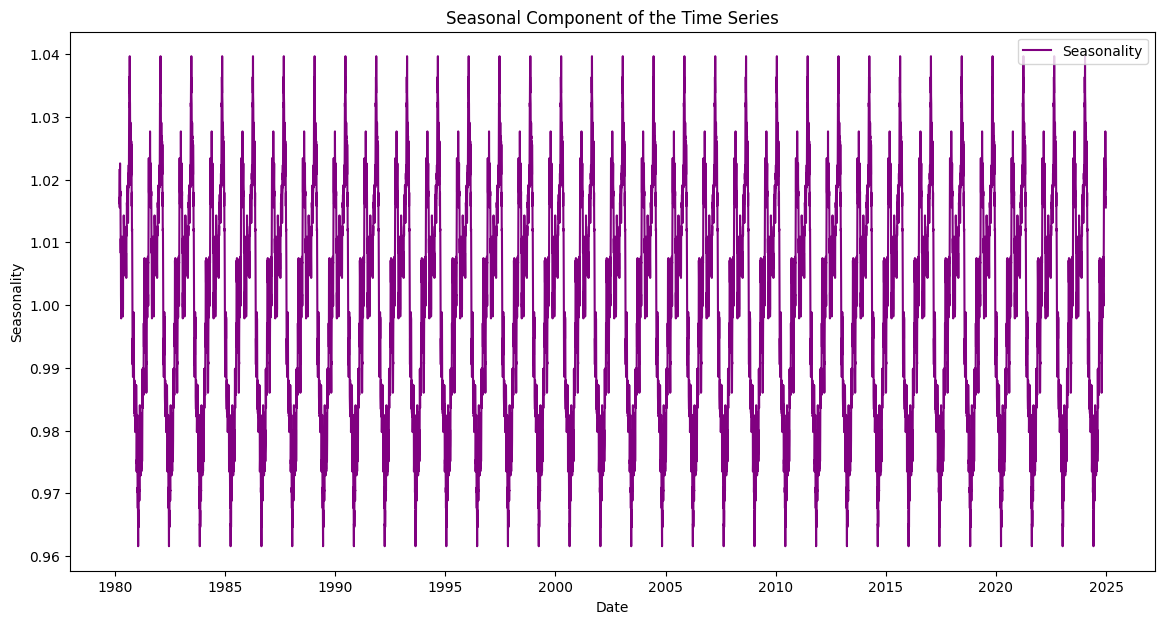

In [ ]:
# Seasonal component from decomposition
plt.figure(figsize=(14, 7))
plt.plot(decomposition.seasonal, label='Seasonality', color='purple')
plt.title('Seasonal Component of the Time Series')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.legend()
plt.show()



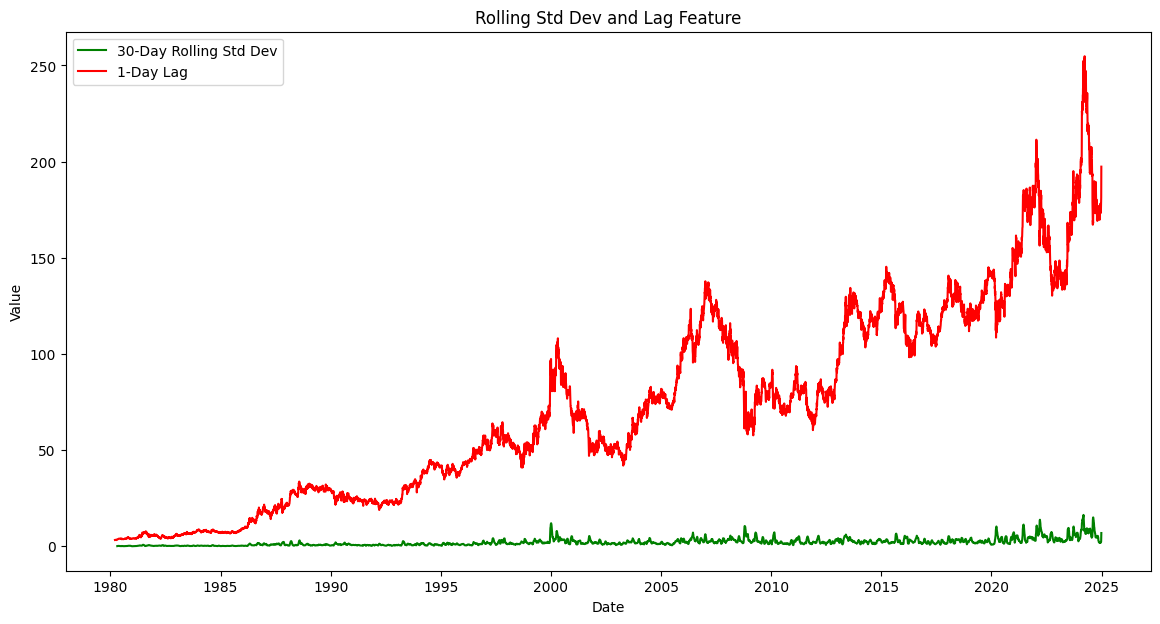

In [ ]:
data['Rolling_Std_30'] = data['Close'].rolling(window=30).std()
data['Lag_1'] = data['Close'].shift(1)

# Visualize the new features
plt.figure(figsize=(14, 7))
plt.plot(data['Rolling_Std_30'], label='30-Day Rolling Std Dev', color='green')
plt.plot(data['Lag_1'], label='1-Day Lag', color='red')
plt.title('Rolling Std Dev and Lag Feature')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
# print(data.isnull().sum())
# data['MA_30'] = data['MA_30'].interpolate(method='linear')
# data['MA_100'] = data['MA_100'].interpolate(method='linear')
# data['Anomalies'] = data['Anomalies'].interpolate(method='linear')
# data['Rolling_Std_30'] = data['Rolling_Std_30'].interpolate(method='linear')
# data['Lag_1'] = data['Lag_1'].ffill()

In [ ]:
# print(data.isnull().sum())

In [ ]:
# # Perform spline interpolation for missing values
# data['MA_30'] = data['MA_30'].interpolate(method='spline', order=3)
# data['MA_100'] = data['MA_100'].interpolate(method='spline', order=3)
# data['Anomalies'] = data['Anomalies'].interpolate(method='spline', order=3)
# data['Rolling_Std_30'] = data['Rolling_Std_30'].interpolate(method='spline', order=3)
# data['Lag_1'] = data['Lag_1'].interpolate(method='spline', order=3)
# print(data.isnull().sum())

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model for time series forecasting
model = ARIMA(data['Close'], order=(5, 1, 0))  # Example parameters, modify as needed
model_fit = model.fit()

# Predict missing values (forecast)
forecast = model_fit.predict(start=0, end=len(data)-1, dynamic=False)

# Fill missing values in the 'Anomalies' column with forecasted values
data['Anomalies'] = data['Anomalies'].fillna(pd.Series(forecast, index=data.index))
data['MA_30'] = data['MA_30'].fillna(pd.Series(forecast, index=data.index))
data['MA_100'] = data['MA_100'].fillna(pd.Series(forecast, index=data.index))
data['Rolling_Std_30'] = data['Rolling_Std_30'].fillna(pd.Series(forecast, index=data.index))
data['Lag_1'] = data['Lag_1'].fillna(pd.Series(forecast, index=data.index))

print(data.isnull().sum())

Close             0
MA_30             0
MA_100            0
Anomalies         0
Rolling_Std_30    0
Lag_1             0
dtype: int64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define features and target variable
X = data.drop(columns=['Close'])
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
lr_pred = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression MAE: {lr_mae:.4f}")
print(f"Linear Regression RMSE: {lr_rmse:.4f}")
print(f"Linear Regression R2: {lr_r2:.4f}")


Linear Regression MAE: 1.4470
Linear Regression RMSE: 2.0838
Linear Regression R2: 0.9956


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MAE: {rf_mae:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.4f}")
print(f"Random Forest R2: {rf_r2:.4f}")


Random Forest MAE: 14.2053
Random Forest RMSE: 26.1327
Random Forest R2: 0.3049


In [ ]:
# # Ensure the Date index is sorted and has frequency information
# data = data.sort_index()

# # # Set the frequency to business days (assuming daily data)
# # data = data.asfreq('B')  # 'B' for business day frequency

# # Resample data if needed to fill missing days
# data = data.resample('B').ffill()  # Forward fill missing values for business days



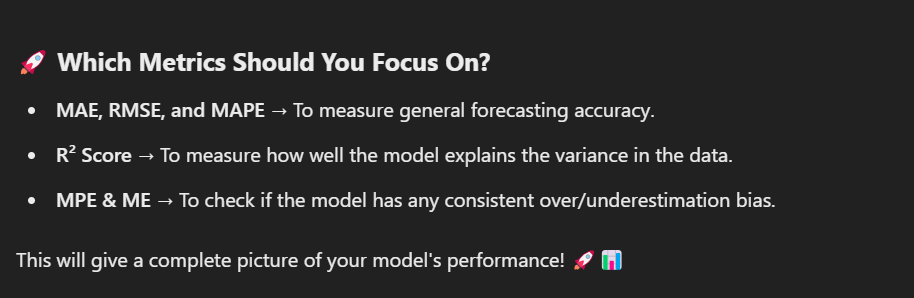

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Define the forecast horizon
forecast_steps = 5

# Ensure 'Close' column is present
if 'Close' not in data.columns:
    raise ValueError("Dataset must contain a 'Close' column for stock prices.")

# Split the data into training and testing sets (80% for training, 20% for testing)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Define exogenous variables (excluding 'Close' column) for both training and testing
exog_train = train_data.drop(columns=['Close']) if len(train_data.columns) > 1 else None
exog_test = test_data.drop(columns=['Close']) if len(test_data.columns) > 1 else None

# Define SARIMAX model on training data
sarima_model = SARIMAX(train_data['Close'],
                       exog=exog_train,
                       order=(1,1,1),  # Adjust based on tuning
                       seasonal_order=(1,1,1,5),  # Assuming 5-day seasonality
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model
sarima_result = sarima_model.fit(disp=False)

# Generate forecast index for the test period
forecast_index = pd.date_range(start=test_data.index[0], periods=forecast_steps + 1, freq='B')[1:]

# Predict the next 5 steps (test data period)
sarima_forecast = sarima_result.predict(start=len(train_data), end=len(train_data) + forecast_steps - 1,
                                        exog=exog_test.tail(forecast_steps) if exog_test is not None else None)

# Convert predictions to DataFrame
forecast_df = pd.DataFrame({'Date': forecast_index, 'Predicted_Close': sarima_forecast.values})

# Save predictions to CSV
forecast_df.to_csv('predicted_stock_prices.csv', index=False)

print("\n📌 Forecasted Stock Prices:")
print(forecast_df)

# Load actual values for evaluation (test set)
y_test = test_data['Close'].head(forecast_steps).values

# Compute evaluation metrics
sarima_mae = mean_absolute_error(y_test, sarima_forecast)
sarima_mse = mean_squared_error(y_test, sarima_forecast)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mape = mean_absolute_percentage_error(y_test, sarima_forecast)
sarima_r2 = r2_score(y_test, sarima_forecast)
sarima_me = np.mean(y_test - sarima_forecast)  # Mean Error
sarima_median_ae = np.median(np.abs(y_test - sarima_forecast))  # Median Absolute Error
sarima_mpe = np.mean((y_test - sarima_forecast) / y_test) * 100  # Mean Percentage Error

# Print performance metrics
print("\n📈 SARIMAX Performance Metrics:")
print(f"Mean Absolute Error (MAE): {sarima_mae:.4f}")
print(f"Mean Squared Error (MSE): {sarima_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {sarima_rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {sarima_mape:.4f}")
print(f"R-squared (R² Score): {sarima_r2:.4f}")
print(f"Mean Error (ME): {sarima_me:.4f}")
print(f"Median Absolute Error: {sarima_median_ae:.4f}")
print(f"Mean Percentage Error (MPE): {sarima_mpe:.4f}%")


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



📌 Forecasted Stock Prices:
        Date  Predicted_Close
0 2016-01-15        90.001240
1 2016-01-18        89.163468
2 2016-01-19        88.900410
3 2016-01-20        86.373078
4 2016-01-21        83.749442

📈 SARIMAX Performance Metrics:
Mean Absolute Error (MAE): 25.4825
Mean Squared Error (MSE): 652.1081
Root Mean Squared Error (RMSE): 25.5364
Mean Absolute Percentage Error (MAPE): 0.2253
R-squared (R² Score): -241.3797
Mean Error (ME): 25.4825
Median Absolute Error: 26.2269
Mean Percentage Error (MPE): 22.5310%


In [ ]:
# Compare the performance of all models
models = ['Linear Regression', 'Random Forest', 'SARIMAX']
mae_values = [lr_mae, rf_mae, sarima_mae]
rmse_values = [lr_rmse, rf_rmse, sarima_rmse]
r2_values = [lr_r2, rf_r2, None]  # SARIMAX does not have R2 directly

results = pd.DataFrame({
    'Model': models,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R2': r2_values
})

print(results)


               Model        MAE       RMSE        R2
0  Linear Regression   1.446952   2.083786  0.995580
1      Random Forest  14.205261  26.132723  0.304862
2            SARIMAX  25.482472  25.536407       NaN
